In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

$V_{n}$ = noise (V)
<br>
$V_{j}$ = Johnson noise (V)
<br>
$T$ = temperature (K)
<br>
$R$ = resistance ($\Omega$) 
<br> 
$$ \frac{\langle V_{j}^{2} \rangle - \langle V_{n}^{2} \rangle}{4T\int{g^{2}(f)df}} = kR$$ 

We measure $V_{j}$ = $V_rms$ (using the picoscope), $T$ (using a thermometer), $V_{n}$ (amplifier on without any voltage), $R$ (using multimeter).

The slope of the line will be fundamental constant $k$

##### Equipment 

1) Picoscope program 
<br>
2) Amplifier 
<br>
3) Custom A-B alligator clip 
<br> 
4) Resistors varying from 100-600k$\Omega$ 
<br>
5) Shielding 

### Constant gain and no added noise

|  Resistance ($M\Omega$) |     Voltage (V)         |Temperature (K$\circ$)| 
|-------------------------|-------------------------|----------------------|
|     0.0820 $\pm$ 0.0001 |   0.06505 $\pm$ 0.00056 |  295.2 $\pm$ 0.1     | 
|     0.1210 $\pm$ 0.0001 |   0.0816 $\pm$ 0.0007   |  294.0 $\pm$ 0.1     |
|     0.181 $\pm$ 0.0001  |   0.1015 $\pm$ 0.0007   |  296.3 $\pm$ 0.1     |
|     0.22                |   0.114 $\pm$ 0.0004    |  295.5 $\pm$ 0.1     |
|     0.33                |   0.1456 $\pm$ 0.0008   |  296.3 $\pm$ 0.1     |
|     0.39                |   0.1647 $\pm$ 0.0008   |  297.1 $\pm$ 0.1     | 
|     0.47                |   0.1860 $\pm$ 0.0015   |  294.8 $\pm$ 0.1     |
|     0.57                |   0.2083 $\pm$ 0.0009   |  296.5 $\pm$ 0.1     |

In [52]:
data = [0.06505, 0.0816, 0.1015, 0.114, 0.1456, 0.1647, 0.1860, 0.2083]
T = [295.2, 294.0, 296.3, 295.5, 296.3, 297.1, 294.8, 296.5]
ohms = [.0820, 0.1210, .181, .22, .33, .39, .47, .57]
GB = 3.03e12

In [53]:
y_axis = []
x_axis = []

for i in range(len(data)):
    y_point = (data[i]**2 - 0.005**2) / (4*T[i]*GB)
    y_axis.append(y_point)

for i in range(len(ohms)):
    x_point = ohms[i]*1000000
    x_axis.append(x_point)
    

In [54]:
print(y_axis)
print(x_axis)

[1.1757153230566959e-18, 1.861644327698076e-18, 2.8618222098956435e-18, 3.621707348399814e-18, 5.896251791902106e-18, 7.526299331380463e-18, 9.675687718025535e-18, 1.2067044562803669e-17]
[82000.0, 121000.0, 181000.0, 220000.0, 330000.0, 390000.0, 470000.0, 570000.0]


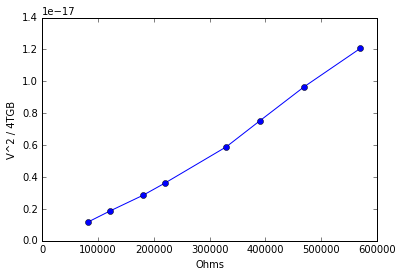

In [55]:
plt.plot(x_axis, y_axis, '-o')
plt.ylabel("V^2 / 4TGB")
plt.xlabel("Ohms")

In [56]:
coeffs = np.polyfit(x_axis, y_axis, 1, full = True)
coeffs_2 = np.polyfit(ohms, y_axis, 1)
print(coeffs)

(array([ 2.24823856e-23, -1.05777335e-18]), array([6.59249594e-37]), 2, array([1.3698472 , 0.35145222]), 1.7763568394002505e-15)


### Adding in Variable gain

| Resistance ($M\Omega$) | G2B (no units)            | 
|------------------------|---------------------------|
|           82           | $2.482 \times 10^{12} $   |  
|           121          | $2.555 \times 10^{12} $   |  
|           180          | $2.520 \times 10^{12} $   |  
|           220          | $2.542 \times 10^{12} $   |             
|           330          | $2.497 \times 10^{12} $   |      
|           390          | $2.666 \times 10^{12} $   |      
|           470          | $2.707 \times 10^{12} $   |             
|           570          | $2.621 \times 10^{12} $   |                          

In [57]:
# Measured data 

V_j = [0.06505, 0.0816, 0.1015, 0.114, 0.1456, 0.1647, 0.1860, 0.2083]
T = [295.2, 294.0, 296.3, 295.5, 296.3, 297.1, 294.8, 296.5]
R = [.0820, 0.1210, .181, .22, .33, .39, .47, .57]
V_n = .07887 # measured during shot noise 
G2B = [2.482e12, 2.555e12, 2.520e12, 2.542e12, 2.497e12, 2.666e12, 2.707e12, 2.621e12]

In [58]:
y_axis = []   # Volts / Kelvin
x_axis = []   # Joules * Ohms / Kelvin 

for i in range(len(V_j)):
    y_point = (V_j[i]**2 - V_n**2) / (4*T[i]*G2B[i])
    y_axis.append(y_point)

for i in range(len(ohms)):
    x_point = ohms[i]*1000000
    x_axis.append(x_point)

In [59]:
print(y_axis)
print(x_axis)

[-6.786581544300534e-19, 1.4580025160749296e-19, 1.3666480173462123e-18, 2.255016933786499e-18, 5.0613835150949284e-18, 6.598422504060887e-18, 8.889312014080786e-18, 1.1957002206204525e-17]
[82000.0, 121000.0, 181000.0, 220000.0, 330000.0, 390000.0, 470000.0, 570000.0]


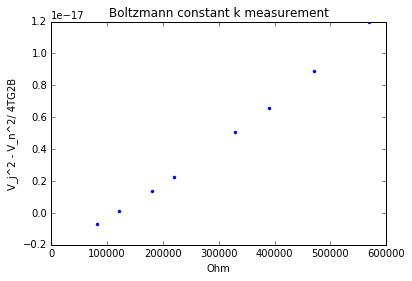

In [122]:
plt.plot(x_axis, y_axis, '.')
plt.ylabel("V_j^2 - V_n^2/ 4TG2B")
plt.xlabel("Ohm")
plt.title("Boltzmann constant k measurement")

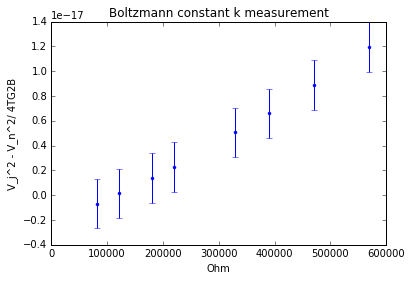

In [124]:
x_err = [0, 0, 0, 0, 0, 0, 0, 0]
y_err = [0.2e-17, 0.2e-17, 0.2e-17, 0.2e-17, 0.2e-17, 0.2e-17, 0.2e-17, 0.2e-17]
plt.errorbar(x_axis, y_axis, xerr=x_err, yerr=y_err, fmt = '.')
plt.ylabel("V_j^2 - V_n^2/ 4TG2B")
plt.xlabel("Ohm")
plt.title("Boltzmann constant k measurement")

In [90]:
#coeffs = np.polyfit(x_axis, y_axis, 1, full = True)
coeffs = np.polyfit(x_axis, y_axis, 1)
#coeffs_2 = np.polyfit(R, y_axis, 1)
print(coeffs)
k = 1.3806488e-23
print("accepted value:", k)
print("k_boltzmann is", coeffs[0])

[ 2.57362126e-23 -3.15568490e-18]
accepted value: 1.3806488e-23
k_boltzmann is 2.573621256734097e-23


(-4e-18, 1.4e-17)

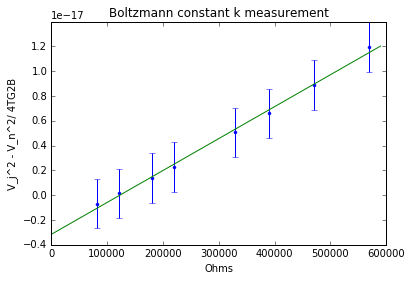

In [127]:
# create line of best fit 
p = np.poly1d(coeffs)
xp = np.linspace(0, x_axis[-1]+20000, 1000)

# plot data with error
plt.errorbar(x_axis, y_axis, xerr=x_err, yerr=y_err, fmt = '.')

# plot line of best fit 
plt.plot(xp, p(xp), '-')

# add labels and limits 
plt.ylabel("V_j^2 - V_n^2/ 4TG2B")
plt.xlabel("Ohms")
plt.title("Boltzmann constant k measurement")
plt.ylim(-0.4e-17, 1.4e-17)

We have error in $V_j$, $V_{n}$, $R$, and $T$

In [62]:
# Adding error with multiple variables 

def error_k(Vj, Vn, R, T, dVj, dVn, dR, dT, g2):
    '''
    returns the error of the boltzmann constant k 
    '''
    dkdT = -(Vj**2 - Vn**2) / (4*(T**2)*R*g2)
    dkdR = -(Vj**2 - Vn**2) / (4*T*(R**2)*g2)
    dkdVj = (2*Vj) / (4*T*R*g2)
    dkdVn = -(2*Vn) / (4*T*R*g2)
    
    term1 = dkdT**2 * dT**2
    term2 = dkdR**2 * dR**2
    term3 = dkdVj**2 * dVj**2
    term4 = dkdVn**2 * dVn**2
    
    sum_of_terms = term1 + term2 + term3 + term4
    square_of_sums = np.sqrt(sum_of_terms)
    error_k = square_of_sums
    return error_k 


In [69]:
# Measured data 

V_j = [0.06505, 0.0816, 0.1015, 0.114, 0.1456, 0.1647, 0.1860, 0.2083]
T = [295.2, 294.0, 296.3, 295.5, 296.3, 297.1, 294.8, 296.5]
R_raw = [.0820, 0.1210, .181, .22, .33, .39, .47, .57]
R = [i*1000000 for i in R_raw]
V_n = .07887 # measured during shot noise 
G2B = [2.482e12, 2.555e12, 2.520e12, 2.542e12, 2.497e12, 2.666e12, 2.707e12, 2.621e12]

dV_j = [0.00056, 0.0007, 0.0007, 0.0004, 0.0008, 0.0008, 0.0015, 0.0009]
dR_raw = [0.0001, 0.0001, 0.0001, 0, 0, 0, 0, 0]
dR = [i * 1000000 for i in dR_raw]
dT = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
dV_n = 0.010 # still need this data 

|  $R$ ($M\Omega$)      |     $V_{rms}$ (V)         |     $T$ (K$\circ$)     |$g^2$ (no units)        | 
|-----------------------|---------------------------|------------------------|------------------------|
| $0.0820$$\pm$$0.0001$ |   $0.06505$$\pm$$0.00056$ |  $295.2$$\pm$$0.1$     |$2.482$$\times$$10^{12}$|
| $0.1210$$\pm$$0.0001$ |   $0.0816$$\pm$$0.0007$   |  $294.0$$\pm$$0.1$     |$2.555$$\times$$10^{12}$|
| $0.181$$\pm$$0.0001$  |   $0.1015$$\pm$$0.0007$   |  $296.3$$\pm$$0.1$     |$2.520$$\times$$10^{12}$|
| $0.22$                |   $0.114$$\pm$$0.0004$    |  $295.5$$\pm$$0.1$     |$2.542$$\times$$10^{12}$|
| $0.33$                |   $0.1456$$\pm$$0.0008$   |  $296.3$$\pm$$0.1$     |$2.497$$\times$$10^{12}$|
| $0.39$                |   $0.1647$$\pm$$0.0008$   |  $297.1$$\pm$$0.1$     |$2.666$$\times$$10^{12}$|
| $0.47$                |   $0.1860$$\pm$$0.0015$   |  $294.8$$\pm$$0.1$     |$2.707$$\times$$10^{12}$|
| $0.57$                |   $0.2083$$\pm$$0.0009$   |  $296.5$$\pm$$0.1$     |$2.621$$\times$$10^{12}$|

$$\text{Table 3: Data of temperature and RMS voltages with different resistances}$$

In [70]:
errors_in_k = []

for i in range(len(V_j)):
    k_error = error_k(V_j[i], V_n, R[i], T[i], dV_j[i], dV_n, dT[i], dR[i], G2B[i])
    errors_in_k.append(k_error)
    
print(errors_in_k)

[7.143853134624199e-24, 4.3693145882563626e-24, 3.882907669903738e-24, 2.3902911023104746e-24, 1.632687377758654e-24, 1.29429050418962e-24, 1.1152465776363185e-24, 9.150604654564904e-25]


The list above is a list of the errors in $k$ for each measurement. In order to calculate the error on $k$ across all measurements, we use the following formula: 

$$ \sigma_k = \sqrt{\frac{1}{N} \sum_{i=1}^{N} \delta k_{i}^2}$$ 

In [85]:
test0 = np.square(errors_in_k)
test1 = sum(test0)
test2 = test1 / len(errors_in_k)
test3 = np.sqrt(test2)
print(test0)
print(test1)
print(test2)
print("dk = ", test3)

[5.10346376e-47 1.90909100e-47 1.50769720e-47 5.71349155e-48
 2.66566807e-48 1.67518791e-48 1.24377493e-48 8.37335655e-49]
9.73379776741106e-47
1.2167247209263824e-47
dk =  3.488158139944894e-24


In [128]:
# Adding error with multiple variables with respect to kR 

def error_f(Vj, Vn, T, dVj, dVn, dT, g2):
    '''
    returns the error of the boltzmann constant k 
    '''
    dkdT = -(Vj**2 - Vn**2) / (4*(T**2)*g2)
    dkdVj = (2*Vj) / (4*T*g2)
    dkdVn = -(2*Vn) / (4*T*g2)
    
    term1 = dkdT**2 * dT**2
    term2 = dkdVj**2 * dVj**2
    term3 = dkdVn**2 * dVn**2
    
    sum_of_terms = term1 + term2 + term3
    square_of_sums = np.sqrt(sum_of_terms)
    error_k = square_of_sums
    return error_k 

In [130]:
errors_in_kR = []

for i in range(len(V_j)):
    kR_error = error_f(V_j[i], V_n, T[i], dV_j[i], dV_n, dT[i], G2B[i])
    errors_in_kR.append(kR_error)
    
print(errors_in_kR)

[5.387986462833091e-19, 5.263560169581093e-19, 5.302795997407048e-19, 5.258645962154921e-19, 5.387895425239117e-19, 5.047781825524224e-19, 5.241745646783678e-19, 5.216000548742944e-19]


In [145]:
import matplotlib
%precision %g
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['savefig.dpi'] = 120
matplotlib.rcParams['figure.dpi'] = 120
%matplotlib inline

(0, 600000)

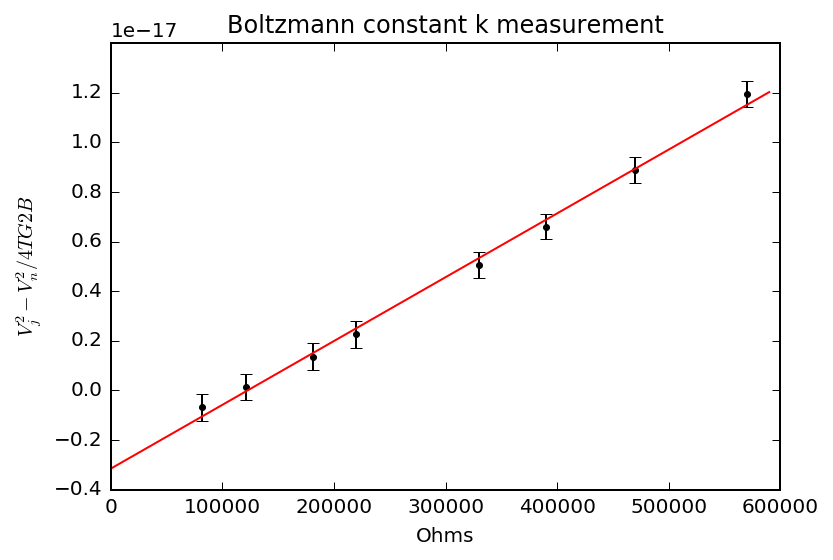

In [151]:
# plot data with error
plt.errorbar(x_axis, y_axis, xerr=x_err, yerr=errors_in_kR, fmt = '.', color = 'black')

# plot line of best fit 
plt.plot(xp, p(xp), 'r-')

# add labels and limits 
plt.ylabel('$V_j^2 - V_n^2 / 4TG2B$')
plt.xlabel("Ohms")
plt.title("Boltzmann constant k measurement")
plt.ylim(-0.4e-17, 1.4e-17)
plt.xlim(0, 600000)

## After changing gain factor in ROOT Code

|     $R$ (M$\Omega$)       |        $V_{rms}$ $(V)$           |     $$T (K\circ)$$     |$$g^2(f)$$| 
|-----------------------|---------------------------|------------------------|----------------|
| $0.0820$$\pm$$0.0001$ |   $0.06505$$\pm$$0.00056$ |  $295.2$$\pm$$0.1$ |$3.09655$$\times$$10^{12}$$\pm$$0.38486$$\times$$10^{12}$|
| $0.1210$$\pm$$0.0001$ |   $0.0816$$\pm$$0.0007$   |  $294.0$$\pm$$0.1$ |$3.2352$$\times$$10^{12}$$\pm$$0.38486$$\times$$10^{12}$|
| $0.181$$\pm$$0.0001$  |   $0.1015$$\pm$$0.0007$   |  $296.3$$\pm$$0.1$ |$3.32042$$\times$$10^{12}$$\pm$$0.38486$$\times$$10^{12}$|
| $0.22$                |   $0.114$$\pm$$0.0004$    |  $295.5$$\pm$$0.1$ |$3.31051$$\times$$10^{12}$$\pm$$0.38486$$\times$$10^{12}$|
| $0.33$                |   $0.1456$$\pm$$0.0008$   |  $296.3$$\pm$$0.1$ |$3.29273$$\times$$10^{12}$$\pm$$0.38486$$\times$$10^{12}$|
| $0.39$                |   $0.1647$$\pm$$0.0008$   |  $297.1$$\pm$$0.1$ |$3.52032$$\times$$10^{12}$$\pm$$0.38486$$\times$$10^{12}$|
| $0.47$                |   $0.1860$$\pm$$0.0015$   |  $294.8$$\pm$$0.1$ |$3.49177$$\times$$10^{12}$$\pm$$0.38486$$\times$$10^{12}$|
| $0.57$                |   $0.2083$$\pm$$0.0009$   |  $296.5$$\pm$$0.1$ |$3.44091$$\times$$10^{12}$$\pm$$0.38486$$\times$$10^{12}$|

$V_{noise} = 5.592mV \pm 46.47 \mu V$
$$\text{Table 3: Data of different resistances used for Boltzmann constant measurement}$$

In [1]:
# Measured data 

V_j = [0.06505, 0.0816, 0.1015, 0.114, 0.1456, 0.1647, 0.1860, 0.2083]
T = [295.2, 294.0, 296.3, 295.5, 296.3, 297.1, 294.8, 296.5]
R = [.0820, 0.1210, .181, .22, .33, .39, .47, .57]
#V_n = .07887 # measured during shot noise 
V_n = .0187 # measured during shot noise 
G2B = [3.09655e12, 3.2352e12, 3.32042e12, 3.31051e12, 3.29273e12, 3.52032e12, 3.49177e12, 3.44091e12]

In [2]:
y_axis = []   # Volts / Kelvin
x_axis = []   # Joules * Ohms / Kelvin 

for i in range(len(V_j)):
    y_point = (V_j[i]**2 - V_n**2) / (4*T[i]*G2B[i])
    y_axis.append(y_point)

for i in range(len(R)):
    x_point = R[i]*1000000
    x_axis.append(x_point)

In [8]:
print(y_axis)
print(x_axis)

[1.0616469410685613e-18, 1.6582237185180702e-18, 2.5290076354514908e-18, 3.2318518398009243e-18, 5.34258477506064e-18, 6.400404192012042e-18, 8.317267773154001e-18, 1.0546447321773283e-17]
[82000.0, 121000.0, 181000.0, 220000.0, 330000.0, 390000.0, 470000.0, 570000.0]


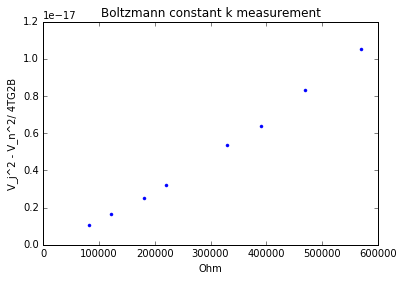

In [5]:
plt.plot(x_axis, y_axis, '.')
plt.ylabel("V_j^2 - V_n^2/ 4TG2B")
plt.xlabel("Ohm")
plt.title("Boltzmann constant k measurement")

In [6]:
coeffs = np.polyfit(x_axis, y_axis, 1)
print(coeffs)
k = 1.3806488e-23
print("accepted value:", k)
print("k_boltzmann is", coeffs[0])

[ 1.93862450e-23 -8.42706119e-19]
accepted value: 1.3806488e-23
k_boltzmann is 1.9386244985686177e-23


(-4e-18, 1.4e-17)

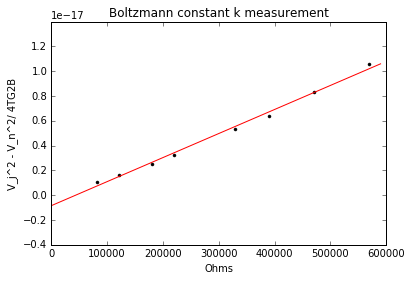

In [7]:
# create line of best fit 
p = np.poly1d(coeffs)
xp = np.linspace(0, x_axis[-1]+20000, 1000)

# plot data with error
plt.plot(x_axis, y_axis, ".", color = 'black')

# plot line of best fit 
plt.plot(xp, p(xp), 'r-')

# add labels and limits 
plt.ylabel("V_j^2 - V_n^2/ 4TG2B")
plt.xlabel("Ohms")
plt.title("Boltzmann constant k measurement")
plt.ylim(-0.4e-17, 1.4e-17)

In [9]:
# Adding error with multiple variables with respect to kR 

def error_f(Vj, Vn, T, G2B, dVj, dVn, dT, dG2B):
    '''
    returns the error of the boltzmann constant k 
    '''
    dkdT = -(Vj**2 - Vn**2) / (4*(T**2)*G2B)
    dkdVj = (2*Vj) / (4*T*G2B)
    dkdVn = -(2*Vn) / (4*T*G2B)
    dkdG2B = -(Vj**2 - Vn**2) / (4*T*G2B**2)
    
    term1 = dkdT**2 * dT**2
    term2 = dkdVj**2 * dVj**2
    term3 = dkdVn**2 * dVn**2
    term4 = dkdG2B**2 * dG2B**2
    
    sum_of_terms = term1 + term2 + term3 +term4
    square_of_sums = np.sqrt(sum_of_terms)
    error_f = square_of_sums
    return error_f 

In [10]:
# Data + errors 

V_j = [0.06505, 0.0816, 0.1015, 0.114, 0.1456, 0.1647, 0.1860, 0.2083]
T = [295.2, 294.0, 296.3, 295.5, 296.3, 297.1, 294.8, 296.5]
R_raw = [.0820, 0.1210, .181, .22, .33, .39, .47, .57]
R = [i * 1000000 for i in R_raw]
V_n = .0187 # this is a placeholder. still need data. 
G2B = [3.09655e12, 3.2352e12, 3.32042e12, 3.31051e12, 3.29273e12, 3.52032e12, 3.49177e12, 3.44091e12]

dV_j = [0.00056, 0.0007, 0.0007, 0.0004, 0.0008, 0.0008, 0.0015, 0.0009]
dR_raw = [0.0001, 0.0001, 0.0001, 0, 0, 0, 0, 0]
dR = [i * 1000000 for i in dR_raw]
dT = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
dG2B = 0.38486e12
dV_n = 0.007 # this is a placeholder. still need data. 

In [14]:
errors_in_kR = []
x_err = [0, 0, 0, 0, 0, 0, 0, 0]

for i in range(len(V_j)):
    kR_error = error_f(V_j[i], V_n, T[i], G2B[i], dV_j[i], dV_n, dT[i], dG2B)
    errors_in_kR.append(kR_error)
    
print(errors_in_kR)

[1.5144042644422344e-19, 2.1106750378665205e-19, 3.027460634538954e-19, 3.8233875418616645e-19, 6.308767947399771e-19, 7.053402851395905e-19, 9.288681592744258e-19, 1.1849182507338012e-18]


(0, 600000)

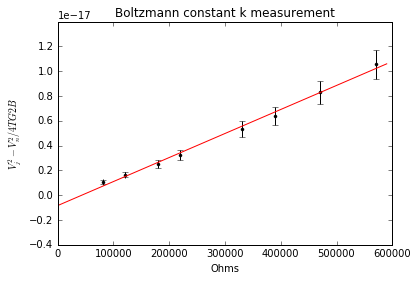

In [15]:
# plot data with error
plt.errorbar(x_axis, y_axis, xerr=x_err, yerr=errors_in_kR, fmt = '.', color = 'black')

# plot line of best fit 
plt.plot(xp, p(xp), 'r-')

# add labels and limits 
plt.ylabel('$V_j^2 - V_n^2 / 4TG2B$')
plt.xlabel("Ohms")
plt.title("Boltzmann constant k measurement")
plt.ylim(-0.4e-17, 1.4e-17)
plt.xlim(0, 600000)

In [19]:
print("y-axis ---- ", y_axis)
print()
print("x-axis ---- ", x_axis)
print()
print("errors in y ---- ", errors_in_kR)

y-axis ----  [1.0616469410685613e-18, 1.6582237185180702e-18, 2.5290076354514908e-18, 3.2318518398009243e-18, 5.34258477506064e-18, 6.400404192012042e-18, 8.317267773154001e-18, 1.0546447321773283e-17]

x-axis ----  [82000.0, 121000.0, 181000.0, 220000.0, 330000.0, 390000.0, 470000.0, 570000.0]

errors in y ----  [1.5144042644422344e-19, 2.1106750378665205e-19, 3.027460634538954e-19, 3.8233875418616645e-19, 6.308767947399771e-19, 7.053402851395905e-19, 9.288681592744258e-19, 1.1849182507338012e-18]


We run ROOT code that computes a linear fit using the error we calculated. The results are below: 

$$ k = 1.776 \times 10^{-23} \pm 1.204 \times 10^{-24}$$
 
We calculate the number of sigmas we are away from the accepted value using the following formula: 

$$ |k_{experiment} - k_{accepted} | < \sigma \times k_{error} $$ 

We solve for the smallest sigma where this equality holds. 

In [2]:
exp_diff = 3.954e-24
error = 1.204e-24
sigma = 3.5
print("We are within", sigma, "sigma of the mean:", exp_diff < (sigma)*error)

We are within 3.5 sigma of the mean: True
